## Python Numpy 선형대수

- 단위행렬 (Unit matrix): np.eye(n)
- 대각행렬 (Diagonal matrix): np.diag(x)
- 내적 (Dot product, Inner product): np.dot(a, b)
- 대각합 (Trace): np.trace(x)
- 행렬식 (Matrix Determinant): np.linalg.det(x)
- 역행렬 (Inverse of a matrix): np.linalg.inv(x)
- 고유값 (Eigenvalue), 고유벡터 (Eigenvector): w, v = np.linalg.eig(x)
- 특이값 분해 (Singular Value Decomposition): u, s, vh = np.linalg.svd(A)
- 연립방정식 해 풀기 (Solve a linear matrix equation): np.linalg.solve(a, b)
- 최소자승 해 풀기 (Compute the Least-squares solution): m, c = np.linalg.lstsq(A, y, rcond=None)[0]

https://rfriend.tistory.com/380


In [2]:
# 정방행렬/정사각형 행렬 : 같은 수의 행과 열을 갖는 행렬(nxn 행렬)
import numpy as np
np.arange(9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [4]:
# 대각 정방행렬 : 주대각선 원소외에 모두 0인 정방행렬
np.diag([1,2,3,4,5])

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

In [6]:
# 항등행렬 : 단위행렬(unit matrix)라고도 하며 주대각선 원소가 모두 1이고 나머지 원소는 모두 0인 정방행렬
np.identity(3)
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

벡터와 행렬의 연산
- 벡터/행렬의 덧셈과 뺄셈 : 같은 위치에 있는 원소끼리 수행. 요소별 연산
- 스칼라와 벡터/행렬의 곱셈
- 브로드캐스팅 : 스칼라를 벡터로 변환한 연산을 허용
- 벡터와 벡터의 곱셈. 내적
 - 두 벡터의 차원(길이)이 같아야 한다.
 - 앞의 벡터가 행벡터이고 위의 벡터가 열벡터여야 한다.
 - 내적의 결과는 스칼라 값이 됨. dot() 또는 @ 연산자로 계산


In [8]:
import numpy as np
x = np.array([10,11,12,13,14])
y = np.array([0,1,2,3,4])
print(x + y)
print(x - y)

[10 12 14 16 18]
[10 10 10 10 10]


In [10]:
np.array([[5,6],[7,8]])

array([[5, 6],
       [7, 8]])

In [11]:
np.array([[10,20],[30,40]])

array([[10, 20],
       [30, 40]])

In [13]:
np.array([[1,2],[3,4]])

array([[1, 2],
       [3, 4]])

In [9]:
np.array([[5,6],[7,8]]) + np.array([[10,20],[30,40]]) - np.array([[1,2],[3,4]])

array([[14, 24],
       [34, 44]])

In [14]:
# 브로드캐스팅
x1 = np.array([10,11,12])
x1 + 3

array([13, 14, 15])

In [16]:
x1 * 3
np.dot(3,x1)

array([30, 33, 36])

행렬 곱을 응용하여 신경망에 적용
<img src = '행렬곱.jpg' STYLE = 'width:300px;'>

In [22]:
x = np.arange(1,7).reshape(2,3)
y = np.array([[6,23],[-1,7],[8,9]])
print(x,'\n')
print(y)

[[1 2 3]
 [4 5 6]] 

[[ 6 23]
 [-1  7]
 [ 8  9]]


In [23]:
np.dot(x,y)

array([[ 28,  64],
       [ 67, 181]])

In [26]:
# 행렬의 내적 : dot() or @연산자
# (1,3) * (3,1) = (1,)
x = np.array([[1],[2],[3]])
y = np.array([[4],[5],[6]])
print(x.T)
print(y)
x.T @ y

[[1 2 3]]
[[4]
 [5]
 [6]]


array([[32]])

In [28]:
# 1차원 ndarray는 전치연산이 정의되지 않는다.
x = np.array([1,2,3])
y = np.array([4,5,6])
print(x)
print(y)

x @ y

[1 2 3]
[4 5 6]


32

In [29]:
# p 주식가격, n 주식수일 때 매수금액을 내적으로 구하기
p = np.array([100,80,50])
n = np.array([3,4,5])
np.dot(p,n)

870

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
(8, 8)
[[ 0.]
 [ 0.]
 [ 5.]
 [13.]
 [ 9.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


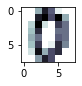

In [34]:
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

digits = load_digits()
d1 = digits.images[0]
print(d1)
print(d1.shape)
v1 = d1.reshape(64,1)
print(v1[:10,:])
plt.figure(figsize=(1,1))
plt.imshow(d1,aspect=1,
          interpolation = 'nearest',cmap=plt.cm.bone_r)

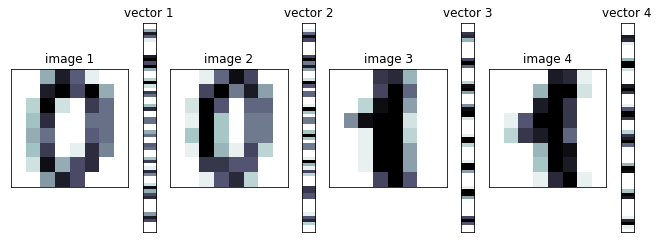

In [35]:
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

digits = load_digits()
d1 = digits.images[0]
d2 = digits.images[10]
d3 = digits.images[1]
d4 = digits.images[11]
v1 = d1.reshape(64, 1)
v2 = d2.reshape(64, 1)
v3 = d3.reshape(64, 1)
v4 = d4.reshape(64, 1)

plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(1, 8, height_ratios=[1],
                       width_ratios=[9, 1, 9, 1, 9, 1, 9, 1])
for i in range(4):
    plt.subplot(gs[2 * i])
    plt.imshow(eval("d" + str(i + 1)), aspect=1,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("image {}".format(i + 1))
    plt.subplot(gs[2 * i + 1])
    plt.imshow(eval("v" + str(i + 1)), aspect=0.25,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("vector {}".format(i + 1))
plt.tight_layout()
plt.show()


In [37]:
v1.T

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [40]:
(v1.T@v3)[0][0]

1866.0

Text(0.5, 1.0, 'image 3:$0.7x_1+0.3x_2$')

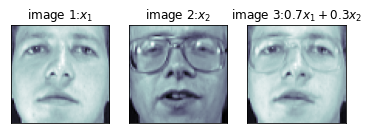

In [46]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

f,ax = plt.subplots(1,3)

ax[0].imshow(faces.images[6], cmap=plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("image 1:$x_1$")

ax[1].imshow(faces.images[10], cmap=plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("image 2:$x_2$")

new_face = 0.7 * faces.images[6] + 0.3 * faces.images[10]
ax[2].imshow(new_face, cmap=plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("image 3:$0.7x_1+0.3x_2$")

In [ ]:
# 행렬과 행렬의 곱셈 : 앞 행렬의 열의 수가 뒤 행렬의 행의 수와 일치해야 한다.


In [3]:
# Q. 행렬 곱셈의 교환 법칙과 분배법칙의 사례를 보여주세요.
import numpy as np
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
C = np.array([[9,8],[7,6]])

In [4]:
A @ B

array([[19, 22],
       [43, 50]])

In [5]:
B @ A

array([[23, 34],
       [31, 46]])

In [6]:
A @ (B+C)

array([[42, 42],
       [98, 98]])

In [7]:
A @ B + A @ C

array([[42, 42],
       [98, 98]])

In [10]:
# Q. 어떤 행렬이든 항등행렬을 곱하면 그 행렬의 값은 변하지 않는다는 사례를 보여주세요.
a=np.eye(3)
b=np.array([[1,2,3],[4,5,6],[7,8,9]])
print(b,'\n')
print(b.dtype)
print(a.dtype)
a@b

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

int32
float64


array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [12]:
A = np.array([[1,2],[3,4]])
D = np.eye(2).astype(int)
print(A,'\n')
print(A@D)

[[1 2]
 [3 4]] 

[[1 2]
 [3 4]]


## 행렬 놈

- 벡터의 놈은 다음 4가지 성질을 만족하면서 벡터에서 실수 값을 연결하는 함수로 정의하고, \||x||로 표기한다.

           1. ||x||은 음수가 아닌 실수값이다. 즉, ||x||>=0
           2. x = 0일때만 ||x|| = 0 이다.
           3. 스칼라 a에 대해서 ||ax|| = |a|||x|| 가 성립한다.
           4. ||x+y|| <= ||x|| + ||y|| 이 성립한다..

- 위 4가지 성질을 만족하기만 하면 놈이라고 할 수 있는데, 많이 사용되는 놈은 다음 세 가지이다. 놈을 구별하기 위하여 아래 첨자를 사용하고, $||x||_1을 1-놈, ||x||_2 를 2-놈, ||x||_\infty를 3-놈$이라고 한다.
- 1-놈은 벡터 x의 성분의 절대값을 모두 더한 것으로, 2-놈은 벡터의 기하학적 길이로, $\infty-놈$은 벡터 성분 중에서 크기가 제일 큰 값으로 정의한다.
- p = 2인 경우가 가장 많이 쓰이므로 p값 표기가 없는 경우 p=2인 프로베니우스 놈을 사용한다.

https://bskyvision.com/825  
https://pasus.tistory.com/34


In [13]:
A = (np.arange(9) - 4).reshape((3,3))
A

array([[-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4]])

In [14]:
np.linalg.norm(A)

7.745966692414834

In [15]:
# 대각합
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [16]:
np.trace(np.eye(3))

3.0

In [16]:
np.trace(np.eye(3))

3.0

행렬식

https://ratsgo.github.io/linear%20algebra/2017/05/21/determinants/

https://www.youtube.com/watch?v=fuVMiyahzH4


In [18]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(A)
np.linalg.det(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


-9.51619735392994e-16

In [ ]:
# 행렬식을 수작업으로 계산
1*3-4*6+7*3

선형 연립방정식
- 선형예측모형은 입력 데이터 벡터와 가중치 벡터의 내적으로 계산된 예측값이 실제 출력 데이터와 유사한 값을 출력하도록 하는 모형
- 연립방정식과 역행렬을 이용하여 선형 예측 모형의 가중치 벡터를 구할 수 있다.

역행렬
- 정방행렬에 대한 역행렬은 원래의 행렬과 다음 관계를 만족하는 정방행렬을 의미 $A^{-1}A = AA^{-1} = I$, I는 항등행렬


In [21]:
np.random.seed(0)
mt1 = np.random.randint(1,4,size=(3,3))
print(mt1,'\n')

mt2 = np.linalg.inv(mt1)
print(mt2)

[[1 2 1]
 [2 2 3]
 [1 3 1]] 

[[ 7. -1. -4.]
 [-1.  0.  1.]
 [-4.  1.  2.]]


In [22]:
np.dot(mt1,mt2)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

dot 과 matmul의 차이

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=cjh226&logNo=221356884894


In [25]:
np.matmul(mt1,mt2)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [24]:
# dot() vs matmul()
a1 = np.arange(18).reshape(3,2,3)
a2 = np.arange(18).reshape(3,3,2)
print(a1,'\n')
print(a2)

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]]] 

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]]


In [26]:
display(np.dot(a1,a2), np.matmul(a1,a2))
display(np.dot(a1,a2).shape, np.matmul(a1,a2).shape)

array([[[[ 10,  13],
         [ 28,  31],
         [ 46,  49]],

        [[ 28,  40],
         [100, 112],
         [172, 184]]],


       [[[ 46,  67],
         [172, 193],
         [298, 319]],

        [[ 64,  94],
         [244, 274],
         [424, 454]]],


       [[[ 82, 121],
         [316, 355],
         [550, 589]],

        [[100, 148],
         [388, 436],
         [676, 724]]]])

array([[[ 10,  13],
        [ 28,  40]],

       [[172, 193],
        [244, 274]],

       [[550, 589],
        [676, 724]]])

(3, 2, 3, 2)

(3, 2, 2)